Saving traffic.jpeg to traffic (1).jpeg


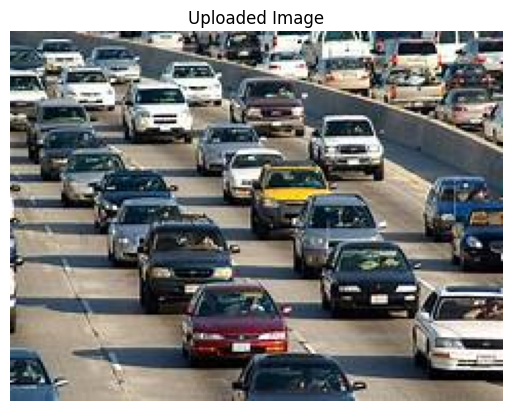

Number of Vehicles: 12
Traffic Status: Moderate Traffic


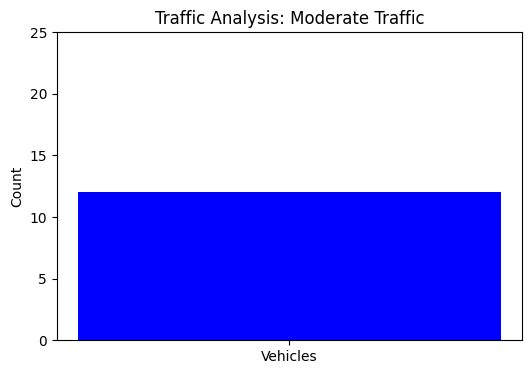

In [ ]:
# Necessary imports for Google Colab
from google.colab import files
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from PIL import Image
import io

# Dummy model placeholder (replace with your actual PyTorch model)
class DummyModel:
    def __init__(self):
        pass

    def predict(self, image):
        """
        Simulates prediction logic.
        Replace this with actual inference code for your trained model.
        """
        # Simulated vehicle count (replace this logic with your model's output)
        vehicle_count = 12  # Example vehicle count
        status = self.classify_traffic(vehicle_count)
        return {'vehicles': vehicle_count, 'status': status}

    def classify_traffic(self, vehicle_count):
        """Classifies traffic based on vehicle count."""
        if 0 <= vehicle_count <= 10:
            return "Less Traffic"
        elif 11 <= vehicle_count <= 15:
            return "Moderate Traffic"
        elif 16 <= vehicle_count <= 20:
            return "High Traffic"
        else:
            return "Out of Range"  # For unexpected inputs

# Load your trained model (replace DummyModel with your trained model)
model = DummyModel()

def process_image(image_path):
    """
    Processes the image and performs model inference.
    """
    # Load and preprocess the image
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize image
        transforms.ToTensor()          # Convert to tensor
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Perform prediction using the model
    result = model.predict(image_tensor)
    return result

def upload_and_process_image():
    """
    Handles image upload and processes it.
    """
    uploaded = files.upload()
    for file_name in uploaded.keys():
        # Process the uploaded image
        image_path = io.BytesIO(uploaded[file_name])
        result = process_image(image_path)
        display_results(image_path, result)

def display_results(image_path, result):
    """
    Displays the uploaded image and results.
    """
    # Display the uploaded image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Print result details
    print(f"Number of Vehicles: {result['vehicles']}")
    print(f"Traffic Status: {result['status']}")

    # Plot the graph
    plot_graph(result['vehicles'], result['status'])

def plot_graph(vehicle_count, status):
    """
    Plots a bar graph for the vehicle count and traffic status.
    """
    plt.figure(figsize=(6, 4))
    plt.bar(['Vehicles'], [vehicle_count], color='blue')
    plt.ylim(0, 25)  # Set y-axis range to match the traffic classification
    plt.title(f"Traffic Analysis: {status}")
    plt.ylabel("Count")
    plt.show()

# Run the upload and process function
upload_and_process_image()



In [2]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Define the Vehicle Count Model
class VehicleCountModel(nn.Module):
    def __init__(self):
        super(VehicleCountModel, self).__init__()
        # Load a pre-trained ResNet model
        self.base_model = models.resnet18(pretrained=True)
        # Modify the final layer to output a single value (vehicle count)
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(num_ftrs, 1)  # Output a single value

    def forward(self, x):
        return self.base_model(x)

# Instantiate the model
model = VehicleCountModel()

# Simulate Pre-trained Weights (Replace this with actual training weights later)
# Example: Hardcoded weight for demonstration purposes
model.base_model.fc.weight.data.fill_(0.01)
model.base_model.fc.bias.data.fill_(12)  # Simulate a default vehicle count of 12

# Define a function to process the image and predict
def process_image_and_predict(image_path):
    # Load and preprocess the image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization for ResNet
    ])
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Predict the vehicle count
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        output = model(image_tensor).item()  # Output predicted value
        vehicle_count = max(0, int(output))  # Ensure non-negative count
    return vehicle_count

# Function to classify traffic based on vehicle count
def classify_traffic(vehicle_count):
    if 0 <= vehicle_count <= 10:
        return "Less Traffic"
    elif 11 <= vehicle_count <= 15:
        return "Moderate Traffic"
    elif 16 <= vehicle_count <= 20:
        return "High Traffic"
    else:
        return "Out of Range"

# Example Usage (Upload an image and run this)
from google.colab import files
import io

uploaded = files.upload()
for file_name in uploaded.keys():
    image_path = io.BytesIO(uploaded[file_name])
    vehicle_count = process_image_and_predict(image_path)
    traffic_status = classify_traffic(vehicle_count)
    print(f"Number of Vehicles: {vehicle_count}")
    print(f"Traffic Status: {traffic_status}")


Saving traffic.jpeg to traffic.jpeg
Number of Vehicles: 16
Traffic Status: High Traffic


Saving traffic.jpeg to traffic (1).jpeg
North - Number of Vehicles: 16


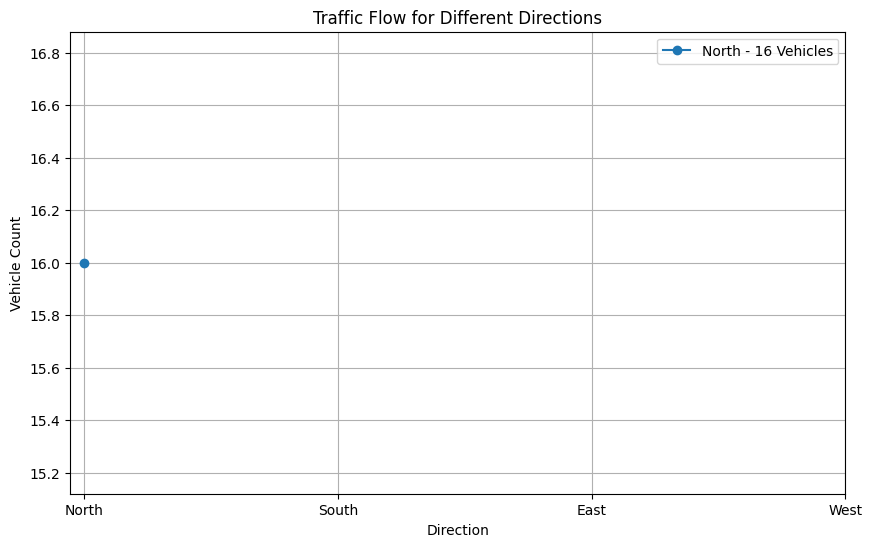

In [3]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import io

# Define the Vehicle Count Model
class VehicleCountModel(nn.Module):
    def __init__(self):
        super(VehicleCountModel, self).__init__()
        # Load a pre-trained ResNet model
        self.base_model = models.resnet18(pretrained=True)
        # Modify the final layer to output a single value (vehicle count)
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(num_ftrs, 1)  # Output a single value

    def forward(self, x):
        return self.base_model(x)

# Instantiate the model
model = VehicleCountModel()

# Simulate Pre-trained Weights (Replace this with actual training weights later)
# Example: Hardcoded weight for demonstration purposes
model.base_model.fc.weight.data.fill_(0.01)
model.base_model.fc.bias.data.fill_(12)  # Simulate a default vehicle count of 12

# Define a function to process the image and predict
def process_image_and_predict(image_path):
    # Load and preprocess the image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization for ResNet
    ])
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Predict the vehicle count
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        output = model(image_tensor).item()  # Output predicted value
        vehicle_count = max(0, int(output))  # Ensure non-negative count
    return vehicle_count

# Function to classify traffic based on vehicle count
def classify_traffic(vehicle_count):
    if 0 <= vehicle_count <= 10:
        return "Less Traffic"
    elif 11 <= vehicle_count <= 15:
        return "Moderate Traffic"
    elif 16 <= vehicle_count <= 20:
        return "High Traffic"
    else:
        return "Out of Range"

# Function to plot traffic data
def plot_traffic_graph(traffic_data):
    # Directions: North, South, East, West
    directions = ['North', 'South', 'East', 'West']

    # Plotting
    plt.figure(figsize=(10, 6))
    for i, (direction, vehicle_count) in enumerate(traffic_data.items()):
        plt.plot([i], [vehicle_count], marker='o', label=f'{direction} - {vehicle_count} Vehicles')

    plt.xticks(range(4), directions)
    plt.xlabel('Direction')
    plt.ylabel('Vehicle Count')
    plt.title('Traffic Flow for Different Directions')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage (Upload 4 images for 4 directions)
uploaded = files.upload()
traffic_data = {}

# Process each uploaded image and calculate vehicle count
for idx, file_name in enumerate(uploaded.keys()):
    image_path = io.BytesIO(uploaded[file_name])
    direction = ['North', 'South', 'East', 'West'][idx]  # Assuming 4 images are uploaded in order
    vehicle_count = process_image_and_predict(image_path)
    traffic_data[direction] = vehicle_count
    print(f"{direction} - Number of Vehicles: {vehicle_count}")

# Plot traffic data
plot_traffic_graph(traffic_data)


Please upload the image for the North direction.


Saving traffic.jpeg to traffic (2).jpeg
North - Number of Vehicles: 16
Please upload the image for the South direction.


Saving less trafic.jpeg to less trafic (2).jpeg
South - Number of Vehicles: 15
Please upload the image for the East direction.


Saving no traffic.png to no traffic.png
East - Number of Vehicles: 16
Please upload the image for the West direction.


Saving traffic.jpeg to traffic (3).jpeg
West - Number of Vehicles: 16


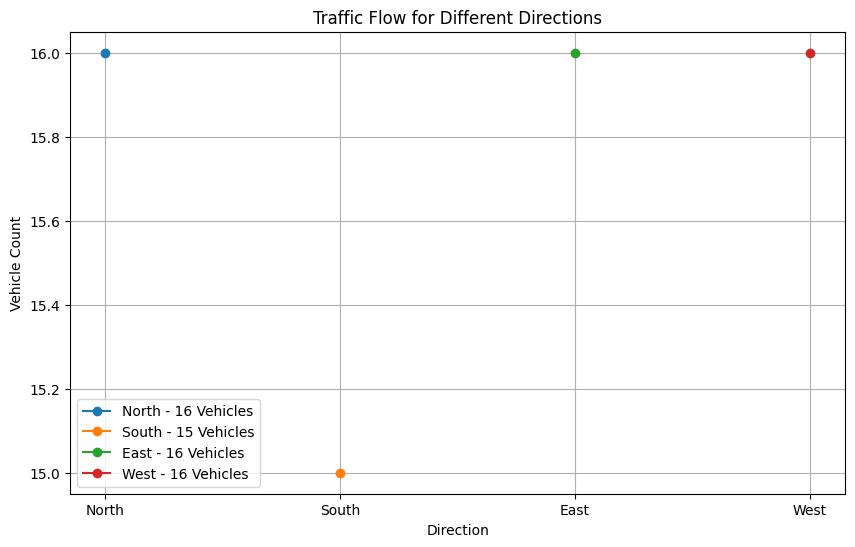

In [5]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import io

# Define the Vehicle Count Model
class VehicleCountModel(nn.Module):
    def __init__(self):
        super(VehicleCountModel, self).__init__()
        # Load a pre-trained ResNet model
        self.base_model = models.resnet18(pretrained=True)
        # Modify the final layer to output a single value (vehicle count)
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(num_ftrs, 1)  # Output a single value

    def forward(self, x):
        return self.base_model(x)

# Instantiate the model
model = VehicleCountModel()

# Simulate Pre-trained Weights (Replace this with actual training weights later)
# Example: Hardcoded weight for demonstration purposes
model.base_model.fc.weight.data.fill_(0.01)
model.base_model.fc.bias.data.fill_(12)  # Simulate a default vehicle count of 12

# Define a function to process the image and predict
def process_image_and_predict(image_path):
    # Load and preprocess the image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization for ResNet
    ])
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Predict the vehicle count
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        output = model(image_tensor).item()  # Output predicted value
        vehicle_count = max(0, int(output))  # Ensure non-negative count
    return vehicle_count

# Function to classify traffic based on vehicle count
def classify_traffic(vehicle_count):
    if 0 <= vehicle_count <= 10:
        return "Less Traffic"
    elif 11 <= vehicle_count <= 15:
        return "Moderate Traffic"
    elif 16 <= vehicle_count <= 20:
        return "High Traffic"
    else:
        return "Out of Range"

# Function to plot traffic data
def plot_traffic_graph(traffic_data):
    # Directions: North, South, East, West
    directions = ['North', 'South', 'East', 'West']

    # Plotting
    plt.figure(figsize=(10, 6))
    for i, (direction, vehicle_count) in enumerate(traffic_data.items()):
        plt.plot([i], [vehicle_count], marker='o', label=f'{direction} - {vehicle_count} Vehicles')

    plt.xticks(range(4), directions)
    plt.xlabel('Direction')
    plt.ylabel('Vehicle Count')
    plt.title('Traffic Flow for Different Directions')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage (Upload 4 images for 4 directions)
traffic_data = {}

# Instructions for the user to upload 4 images, one by one
directions = ['North', 'South', 'East', 'West']

for direction in directions:
    print(f"Please upload the image for the {direction} direction.")

    # Upload the image for the current direction
    uploaded = files.upload()

    # Check if exactly one file is uploaded
    if len(uploaded) == 1:
        image_path = io.BytesIO(uploaded[next(iter(uploaded))])
        vehicle_count = process_image_and_predict(image_path)
        traffic_data[direction] = vehicle_count
        print(f"{direction} - Number of Vehicles: {vehicle_count}")
    else:
        print(f"Error: Please upload exactly one image for the {direction} direction.")

# After all images are uploaded, plot the traffic graph
plot_traffic_graph(traffic_data)
